# Credit Card Consumption Prediction

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from subprocess import check_output
print(check_output(["ls", "../input/"]).decode("utf8"))

# Any results you write to the current directory are saved as output.
filenames = check_output(["ls", "../input/"]).decode("utf8").strip()
        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/consumer-credit-card-prediction/sample_submission.csv
/kaggle/input/consumer-credit-card-prediction/Data_Dictionary.xlsx
/kaggle/input/consumer-credit-card-prediction/TRAIN.csv
/kaggle/input/consumer-credit-card-prediction/TEST.csv
consumer-credit-card-prediction



In [2]:
# import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec 
from scipy import stats
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.simplefilter(action='ignore')

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, BayesianRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor,AdaBoostRegressor
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.svm import SVR, LinearSVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import lightgbm as lgb
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import  make_scorer, mean_squared_error,mean_squared_log_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import math


# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../input/consumer-credit-card-prediction/TRAIN.csv').drop(['id'], axis = 1)
print(df.shape)
df.head()

(24615, 43)


,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,current,M,41,723,30292.00,NaN,2679.49,NaN,17032.745,NaN,3.0,2.0,3.0,NaN,NaN,NaN,200000.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,60454.78,58341.0,10.0,4.0,54240.0,74507.12,80827.0,6.0,8.0,73729.0,60073.14,58057.0,4.0,10.0,53560.0,NaN,3083.69,12163
1,current,M,41,523,9552.05,1867.67,3806.00,473.43,2234.000,793.0,2.0,5.0,3.0,2.0,2.0,5.0,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32652.47,33714.0,19.0,2.0,20000.0,17774.43,19674.0,2.0,8.0,11600.0,8739.36,7716.0,2.0,12.0,7600.0,NaN,3953.04,680
2,current,M,36,864,6204.21,NaN,830.60,NaN,1353.750,NaN,14.0,5.0,2.0,NaN,NaN,NaN,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,200
3,current,M,38,349,40877.62,NaN,19729.60,NaN,30446.610,NaN,12.0,8.0,10.0,NaN,NaN,NaN,50000.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3203.25,25067.0,3.0,1.0,24795.0,24059.24,25003.0,1.0,2.0,24859.0,54018.52,55597.0,3.0,4.0,30000.0,NaN,4059.07,1676
4,current,M,48,523,10046.00,NaN,6046.00,NaN,1151.400,NaN,2.0,4.0,21.0,NaN,NaN,NaN,300000.0,NaN,NaN,NaN,1.0,1497586.08,NaN,50000.0,NaN,74823.50,41012.4,16.0,4.0,40000.0,91188.62,90567.5,7.0,15.0,50000.0,71310.50,130482.0,8.0,16.0,55000.0,NaN,5804.29,1603


In [4]:
df_test = pd.read_csv('../input/consumer-credit-card-prediction/TEST.csv')
test_id = df_test['id']
df_test.drop(['id'], axis = 1, inplace = True)
print(df_test.shape)
df_test.head()

(8205, 42)


,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,current,M,40,324,32205.49,NaN,13836.470,NaN,17693.000,NaN,31.0,19.0,60.0,NaN,NaN,NaN,500000.0,NaN,NaN,NaN,NaN,10827.5,NaN,NaN,NaN,74375.51,68596.00,10.0,1.0,68309.0,74164.80,78397.00,2.0,10.0,68309.0,73432.40,103856.00,3.0,13.0,68409.0,NaN,0.00
1,current,M,31,344,12059.40,759.00,2839.640,NaN,4923.220,NaN,7.0,10.0,18.0,2.0,NaN,NaN,65000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38372.01,31431.00,10.0,2.0,29264.0,13554.05,1198.00,1.0,4.0,1000.0,21272.83,10349.00,2.0,8.0,10000.0,NaN,0.00
2,saving,M,40,534,10832.31,NaN,8198.155,NaN,4299.000,NaN,6.0,NaN,5.0,NaN,NaN,2.0,131000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20047.00,20334.88,1.0,2.0,20000.0,50068.00,66321.23,5.0,2.0,50000.0,39504.00,30389.58,4.0,7.0,20000.0,NaN,6026.40
3,saving,M,34,923,17459.00,976.01,13186.500,NaN,7657.000,NaN,1.0,NaN,4.0,2.0,NaN,2.0,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6002.76,22145.00,9.0,2.0,20000.0,22779.00,4632.00,1.0,5.0,4500.0,2500.00,368.00,1.0,4.0,123.0,NaN,0.00
4,current,M,35,523,870.59,13448.31,25143.960,5385.0,13515.775,NaN,2.0,10.0,4.0,4.0,6.0,3.0,364000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138469.08,111489.59,43.0,10.0,29284.0,66058.81,67242.54,15.0,34.0,29284.0,148340.26,164152.72,12.0,38.0,50000.0,NaN,7482.42


In [5]:
df_submission = pd.read_csv('../input/consumer-credit-card-prediction/sample_submission.csv')
print(df_submission.shape)
df_submission.head()

(8205, 2)


,id,cc_cons
0,16174,7000
1,19966,7000
2,18105,7000
3,1201,7000
4,1595,7000


In [6]:
! pip install openpyxl

     |████████████████████████████████| 242 kB 1.3 MB/s 
  Created wheel for et-xmlfile: filename=et_xmlfile-1.0.1-py3-none-any.whl size=8913 sha256=a53b952977d02e806b286e8976ac5ccd2d62bf377a58b21ac42345092f3b51e1
  Stored in directory: /root/.cache/pip/wheels/e2/bd/55/048b4fd505716c4c298f42ee02dffd9496bb6d212b266c7f31
Successfully built et-xmlfile
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [7]:
pip install --upgrade pip

     |████████████████████████████████| 1.5 MB 1.3 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.0
    Uninstalling pip-21.0:
      Successfully uninstalled pip-21.0
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install xlrd

     |████████████████████████████████| 96 kB 1.1 MB/s 
Note: you may need to restart the kernel to use updated packages.


In [9]:
df_data_dict = df_submission = pd.read_excel('../input/consumer-credit-card-prediction/Data_Dictionary.xlsx')
df_data_dict

,Variable,Description
0,id,Unique ID for every Customer
1,account_type,Account Type – current or saving
2,gender,Gender of customer
3,age,Age of customer
4,region_code,Code assigned to region of residence (has order)
5,cc_cons_apr,Credit card spend in April
6,dc_cons_apr,Debit card spend in April
7,cc_cons_may,Credit card spend in May
8,dc_cons_may,Debit card spend in May
9,cc_cons_jun,Credit card spend in June


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24615 entries, 0 to 24614
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   account_type           24615 non-null  object 
 1   gender                 24615 non-null  object 
 2   age                    24615 non-null  int64  
 3   region_code            24615 non-null  int64  
 4   cc_cons_apr            24615 non-null  float64
 5   dc_cons_apr            10276 non-null  float64
 6   cc_cons_may            24615 non-null  float64
 7   dc_cons_may            11595 non-null  float64
 8   cc_cons_jun            24615 non-null  float64
 9   dc_cons_jun            8678 non-null   float64
 10  cc_count_apr           22847 non-null  float64
 11  cc_count_may           23756 non-null  float64
 12  cc_count_jun           23437 non-null  float64
 13  dc_count_apr           10276 non-null  float64
 14  dc_count_may           11595 non-null  float64
 15  dc

In [11]:
df.describe()

,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
count,24615.000000,24615.000000,24615.000000,10276.000000,2.461500e+04,11595.000000,24615.000000,8678.000000,22847.000000,23756.000000,23437.000000,10276.000000,11595.000000,12955.000000,24609.000000,1992.0,633.0,2154.0,1221.0,1.040000e+03,1.724000e+03,9.960000e+02,302.000000,2.318900e+04,2.209500e+04,23279.000000,23279.000000,2.209500e+04,2.286200e+04,2.204800e+04,23041.000000,23041.000000,2.204800e+04,2.292000e+04,2.342900e+04,23443.000000,23443.000000,2.342900e+04,2.461500e+04,24615.000000
mean,35.910867,554.286289,16724.699679,5837.704149,1.449078e+04,5778.853761,9034.903220,4580.288176,9.195649,9.605910,12.328071,5.290483,6.260716,7.906523,121636.324150,1.0,1.0,1.0,1.0,8.689592e+05,1.782198e+05,4.161000e+04,5029.033214,7.088840e+04,7.637680e+04,14.893466,3.796555,4.687195e+04,6.777295e+04,7.998758e+04,4.093703,13.939716,4.980322e+04,7.775094e+04,7.605872e+04,5.789404,16.023546,4.509387e+04,1.051152e+04,6833.298639
std,8.350756,188.502571,25557.121858,12149.234942,2.428710e+04,15169.627917,15579.128037,9440.029274,11.449178,9.884521,11.908281,6.137896,7.317564,9.108924,123600.524542,0.0,0.0,0.0,0.0,4.829767e+06,4.699193e+05,9.336509e+04,6251.799722,1.798309e+05,1.948909e+05,11.598500,3.514741,1.305665e+05,2.030006e+05,2.096595e+05,3.885775,11.501255,1.252070e+05,3.080153e+05,2.981304e+05,4.749826,13.415936,1.274878e+05,3.009496e+05,12689.409718
min,22.000000,123.000000,233.970000,10.010000,1.030000e+02,20.000000,51.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,2.000000e-02,3.590000e+00,0.000000e+00,-12179.000000,4.010000e+00,3.432000e+01,0.000000,0.000000,1.800000e-01,1.500000e-01,1.061000e+01,0.000000,0.000000,1.500000e-01,5.230000e+00,1.300000e+01,0.000000,0.000000,6.000000e-02,0.000000e+00,0.000000
25%,31.000000,425.000000,3707.050000,844.487500,2.981930e+03,797.000000,1626.000000,740.000000,3.000000,3.000000,4.000000,1.000000,2.000000,2.000000,45000.000000,1.0,1.0,1.0,1.0,5.031000e+03,3.500000e+04,7.444000e+03,977.000000,2.231772e+04,2.533200e+04,6.000000,2.000000,1.800000e+04,2.005925e+04,2.453975e+04,2.000000,6.000000,1.809474e+04,2.518399e+04,2.310900e+04,3.000000,6.000000,1.600000e+04,0.000000e+00,1275.500000
50%,34.000000,575.000000,8911.300000,2294.320000,7.338500e+03,2132.000000,4153.000000,1823.000000,7.000000,7.000000,9.000000,3.000000,4.000000,5.000000,75000.000000,1.0,1.0,1.0,1.0,3.218960e+04,8.500000e+04,2.500000e+04,5439.000000,4.113080e+04,4.399700e+04,12.000000,3.000000,2.804900e+04,3.821506e+04,4.527949e+04,3.000000,11.000000,3.000000e+04,4.616739e+04,4.313000e+04,5.000000,13.000000,2.685405e+04,1.676600e+02,3118.000000
75%,39.000000,683.000000,19896.860000,6163.252500,1.694145e+04,5651.095000,10224.570000,4558.000000,12.000000,13.000000,17.000000,7.000000,8.000000,10.000000,145000.000000,1.0,1.0,1.0,1.0,1.716245e+05,1.774847e+05,5.000000e+04,6885.000000,7.513563e+04,7.945350e+04,20.000000,5.000000,4.800000e+04,7.382796e+04,8.933325e+04,5.000000,19.000000,5.000000e+04,8.424984e+04,8.061868e+04,7.000000,22.000000,4.680320e+04,4.187245e+03,7310.000000
max,224.000000,977.000000,804712.580000,366223.160000,1.117246e+06,911223.490000,382914.100000,167311.000000,1012.000000,601.000000,653.000000,82.000000,97.000000,104.000000,1000000.000000,1.0,1.0,1.0,1.0,8.445222e+07,1.360284e+07,1.650000e+06,35346.000000,1.353571e+07,1.310058e+07,147.000000,78.000000,1.202915e+07,2.2301

In [12]:
# df = df[(df > 0).all(axis=1)]
# cat_cols1 = df_test.select_dtypes(include=[object]).columns.to_list()

df_cat = df.select_dtypes(include=[object])
df_num = df.select_dtypes(include=['int64','float64'])


In [13]:
df_num[df_num < 0] = 0
df_num

,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
0,41,723,30292.00,NaN,2679.49,NaN,17032.745,NaN,3.0,2.0,3.0,NaN,NaN,NaN,200000.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,60454.78,58341.00,10.0,4.0,54240.0,74507.12,80827.00,6.0,8.0,73729.0,60073.14,58057.0,4.0,10.0,53560.0,3083.69,12163
1,41,523,9552.05,1867.67,3806.00,473.43,2234.000,793.0,2.0,5.0,3.0,2.0,2.0,5.0,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32652.47,33714.00,19.0,2.0,20000.0,17774.43,19674.00,2.0,8.0,11600.0,8739.36,7716.0,2.0,12.0,7600.0,3953.04,680
2,36,864,6204.21,NaN,830.60,NaN,1353.750,NaN,14.0,5.0,2.0,NaN,NaN,NaN,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,200
3,38,349,40877.62,NaN,19729.60,NaN,30446.610,NaN,12.0,8.0,10.0,NaN,NaN,NaN,50000.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3203.25,25067.00,3.0,1.0,24795.0,24059.24,25003.00,1.0,2.0,24859.0,54018.52,55597.0,3.0,4.0,30000.0,4059.07,1676
4,48,523,10046.00,NaN,6046.00,NaN,1151.400,NaN,2.0,4.0,21.0,NaN,NaN,NaN,300000.0,NaN,NaN,NaN,1.0,1497586.08,NaN,50000.0,NaN,74823.50,41012.40,16.0,4.0,40000.0,91188.62,90567.50,7.0,15.0,50000.0,71310.50,130482.0,8.0,16.0,55000.0,5804.29,1603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24610,36,626,5334.40,NaN,26637.81,NaN,9491.000,NaN,11.0,4.0,28.0,NaN,NaN,NaN,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127669.00,136235.00,6.0,5.0,45000.0,47585.05,97115.00,4.0,5.0,60000.0,79228.60,21101.0,3.0,3.0,13000.0,0.00,224
24611,34,233,31038.38,41923.00,16028.00,56907.36,14120.970,29116.0,8.0,3.0,32.0,21.0,27.0,22.0,75000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252655.68,220523.00,51.0,5.0,140250.0,91937.79,131427.00,1.0,41.0,131250.0,145421.55,182543.0,4.0,36.0,131250.0,0.00,13111
24612,50,834,6074.98,NaN,13211.93,NaN,27539.000,NaN,13.0,4.0,16.0,NaN,NaN,NaN,175000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61334.88,64135.41,6.0,3.0,50000.0,59001.63,99397.72,6.0,17.0,49000.0,29496.63,554.0,1.0,7.0,279.0,0.00,4258
24613,36,623,95490.90,NaN,51010.16,NaN,3623.000,NaN,26.0,16.0,28.0,NaN,NaN,NaN,136000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5629.39,15700


In [14]:
df = pd.concat([df_num,df_cat], axis=1)
df

,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,account_type,gender,loan_enq
0,41,723,30292.00,NaN,2679.49,NaN,17032.745,NaN,3.0,2.0,3.0,NaN,NaN,NaN,200000.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,60454.78,58341.00,10.0,4.0,54240.0,74507.12,80827.00,6.0,8.0,73729.0,60073.14,58057.0,4.0,10.0,53560.0,3083.69,12163,current,M,NaN
1,41,523,9552.05,1867.67,3806.00,473.43,2234.000,793.0,2.0,5.0,3.0,2.0,2.0,5.0,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32652.47,33714.00,19.0,2.0,20000.0,17774.43,19674.00,2.0,8.0,11600.0,8739.36,7716.0,2.0,12.0,7600.0,3953.04,680,current,M,NaN
2,36,864,6204.21,NaN,830.60,NaN,1353.750,NaN,14.0,5.0,2.0,NaN,NaN,NaN,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,200,current,M,NaN
3,38,349,40877.62,NaN,19729.60,NaN,30446.610,NaN,12.0,8.0,10.0,NaN,NaN,NaN,50000.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3203.25,25067.00,3.0,1.0,24795.0,24059.24,25003.00,1.0,2.0,24859.0,54018.52,55597.0,3.0,4.0,30000.0,4059.07,1676,current,M,NaN
4,48,523,10046.00,NaN,6046.00,NaN,1151.400,NaN,2.0,4.0,21.0,NaN,NaN,NaN,300000.0,NaN,NaN,NaN,1.0,1497586.08,NaN,50000.0,NaN,74823.50,41012.40,16.0,4.0,40000.0,91188.62,90567.50,7.0,15.0,50000.0,71310.50,130482.0,8.0,16.0,55000.0,5804.29,1603,current,M,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24610,36,626,5334.40,NaN,26637.81,NaN,9491.000,NaN,11.0,4.0,28.0,NaN,NaN,NaN,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127669.00,136235.00,6.0,5.0,45000.0,47585.05,97115.00,4.0,5.0,60000.0,79228.60,21101.0,3.0,3.0,13000.0,0.00,224,saving,M,NaN
24611,34,233,31038.38,41923.00,16028.00,56907.36,14120.970,29116.0,8.0,3.0,32.0,21.0,27.0,22.0,75000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252655.68,220523.00,51.0,5.0,140250.0,91937.79,131427.00,1.0,41.0,131250.0,145421.55,182543.0,4.0,36.0,131250.0,0.00,13111,saving,F,NaN
24612,50,834,6074.98,NaN,13211.93,NaN,27539.000,NaN,13.0,4.0,16.0,NaN,NaN,NaN,175000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61334.88,64135.41,6.0,3.0,50000.0,59001.63,99397.72,6.0,17.0,49000.0,29496.63,554.0,1.0,7.0,279.0,0.00,4258,saving,M,NaN
24613,36,623,95490.90,NaN,51010.16,NaN,3623.000,NaN,26.0,16.0,28.0,NaN,NaN,NaN,136000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5629.39,15700,current,M,NaN


# Exploratory Data Analysis

### Credit Card Consumption Feature Analysis

Let's Explore the target feature i.e. Credit Card Consumption ('cc_cons') 

In [15]:
df.describe()

,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
count,24615.000000,24615.000000,24615.000000,10276.000000,2.461500e+04,11595.000000,24615.000000,8678.000000,22847.000000,23756.000000,23437.000000,10276.000000,11595.000000,12955.000000,24609.000000,1992.0,633.0,2154.0,1221.0,1.040000e+03,1.724000e+03,9.960000e+02,302.000000,2.318900e+04,2.209500e+04,23279.000000,23279.000000,2.209500e+04,2.286200e+04,2.204800e+04,23041.000000,23041.000000,2.204800e+04,2.292000e+04,2.342900e+04,23443.000000,23443.000000,2.342900e+04,2.461500e+04,24615.000000
mean,35.910867,554.286289,16724.699679,5837.704149,1.449078e+04,5778.853761,9034.903220,4580.288176,9.195649,9.605910,12.328071,5.290483,6.260716,7.906523,121636.324150,1.0,1.0,1.0,1.0,8.689592e+05,1.782198e+05,4.161000e+04,5519.761589,7.088840e+04,7.637680e+04,14.893466,3.796555,4.687195e+04,6.777295e+04,7.998758e+04,4.093703,13.939716,4.980322e+04,7.775094e+04,7.605872e+04,5.789404,16.023546,4.509387e+04,1.051152e+04,6833.298639
std,8.350756,188.502571,25557.121858,12149.234942,2.428710e+04,15169.627917,15579.128037,9440.029274,11.449178,9.884521,11.908281,6.137896,7.317564,9.108924,123600.524542,0.0,0.0,0.0,0.0,4.829767e+06,4.699193e+05,9.336509e+04,5537.428754,1.798309e+05,1.948909e+05,11.598500,3.514741,1.305665e+05,2.030006e+05,2.096595e+05,3.885775,11.501255,1.252070e+05,3.080153e+05,2.981304e+05,4.749826,13.415936,1.274878e+05,3.009496e+05,12689.409718
min,22.000000,123.000000,233.970000,10.010000,1.030000e+02,20.000000,51.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,2.000000e-02,3.590000e+00,0.000000e+00,0.000000,4.010000e+00,3.432000e+01,0.000000,0.000000,1.800000e-01,1.500000e-01,1.061000e+01,0.000000,0.000000,1.500000e-01,5.230000e+00,1.300000e+01,0.000000,0.000000,6.000000e-02,0.000000e+00,0.000000
25%,31.000000,425.000000,3707.050000,844.487500,2.981930e+03,797.000000,1626.000000,740.000000,3.000000,3.000000,4.000000,1.000000,2.000000,2.000000,45000.000000,1.0,1.0,1.0,1.0,5.031000e+03,3.500000e+04,7.444000e+03,977.000000,2.231772e+04,2.533200e+04,6.000000,2.000000,1.800000e+04,2.005925e+04,2.453975e+04,2.000000,6.000000,1.809474e+04,2.518399e+04,2.310900e+04,3.000000,6.000000,1.600000e+04,0.000000e+00,1275.500000
50%,34.000000,575.000000,8911.300000,2294.320000,7.338500e+03,2132.000000,4153.000000,1823.000000,7.000000,7.000000,9.000000,3.000000,4.000000,5.000000,75000.000000,1.0,1.0,1.0,1.0,3.218960e+04,8.500000e+04,2.500000e+04,5439.000000,4.113080e+04,4.399700e+04,12.000000,3.000000,2.804900e+04,3.821506e+04,4.527949e+04,3.000000,11.000000,3.000000e+04,4.616739e+04,4.313000e+04,5.000000,13.000000,2.685405e+04,1.676600e+02,3118.000000
75%,39.000000,683.000000,19896.860000,6163.252500,1.694145e+04,5651.095000,10224.570000,4558.000000,12.000000,13.000000,17.000000,7.000000,8.000000,10.000000,145000.000000,1.0,1.0,1.0,1.0,1.716245e+05,1.774847e+05,5.000000e+04,6885.000000,7.513563e+04,7.945350e+04,20.000000,5.000000,4.800000e+04,7.382796e+04,8.933325e+04,5.000000,19.000000,5.000000e+04,8.424984e+04,8.061868e+04,7.000000,22.000000,4.680320e+04,4.187245e+03,7310.000000
max,224.000000,977.000000,804712.580000,366223.160000,1.117246e+06,911223.490000,382914.100000,167311.000000,1012.000000,601.000000,653.000000,82.000000,97.000000,104.000000,1000000.000000,1.0,1.0,1.0,1.0,8.445222e+07,1.360284e+07,1.650000e+06,35346.000000,1.353571e+07,1.310058e+07,147.000000,78.000000,1.202915e+07,2.230122e+0

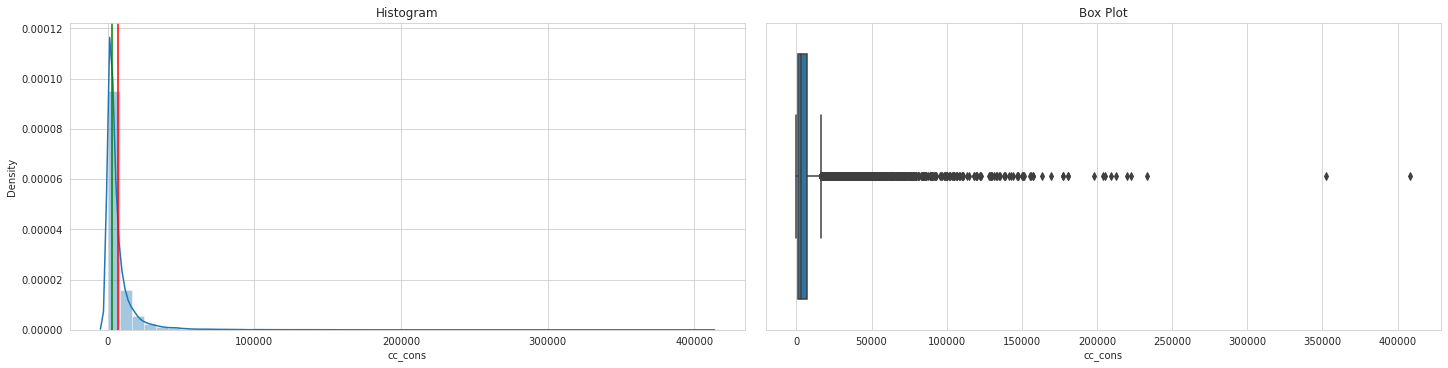

In [16]:
def two_chart_plot(df, feature):
    fig = plt.figure(constrained_layout = True, figsize = (20, 5))
    grid = gridspec.GridSpec(ncols = 2, nrows = 2, figure = fig)
    
    ax1 = fig.add_subplot(grid[0, :1])
    ax1.set_title('Histogram')
    sns.distplot(df.loc[:, feature], norm_hist = True, ax = ax1)
    plt.axvline(x = df[feature].mean(), c = 'red')
    plt.axvline(x = df[feature].median(), c = 'green')
    
    ## Customizing the Box Plot. 
    ax2 = fig.add_subplot(grid[:, 1])
    ## Set title. 
    ax2.set_title('Box Plot')
    sns.boxplot(df.loc[:,feature], orient = 'v', ax = ax2 )
    
two_chart_plot(df, 'cc_cons')

Red line in histogram indicates the mean of the cc_cons and the Green line indicates the median.

From the above plots, we can observe that the consumption is not normally distributed. From the boxplot we can observe that the dataset has too many outliers.

lets check the skewness value of the target vatriable distribution

In [17]:
from scipy.stats import skew
print("Skewness of credit catd consumption is", df['cc_cons'].skew())

Skewness of credit catd consumption is 7.825548684576979


The ideal skewness value should be to between -0.5 and 0.5, for data to be fairly symmetrical and If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. But here the skewness is too high so the data is[](http://) highly skewed.

So lets try removing the outliers from the data and see if the skewness decreases

In [18]:
df.loc[df['cc_cons'] >= 100000 ].shape

(74, 43)

In [19]:
df.drop(df[df['cc_cons'] >= 100000].index, inplace = True)

Skewness of credit catd consumption is 3.8913277805348185


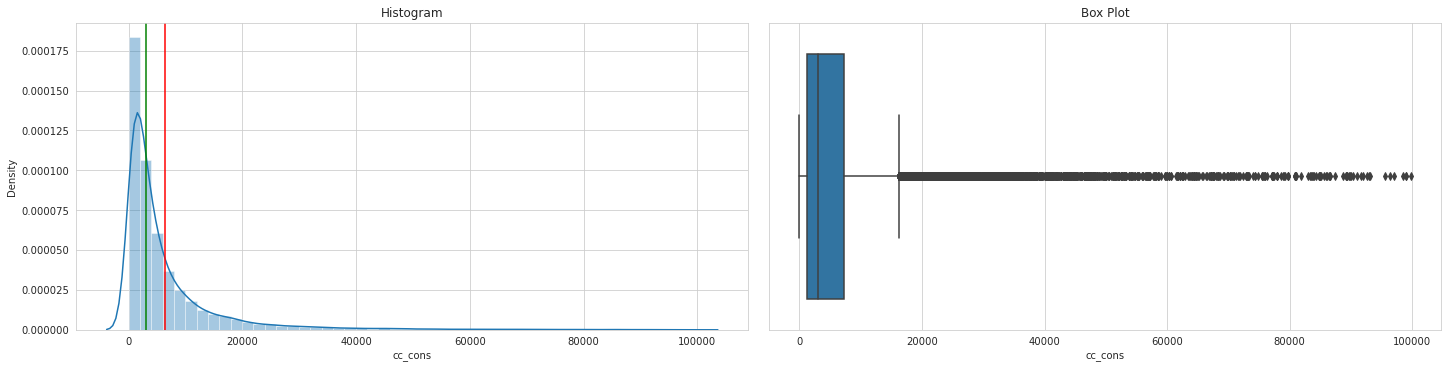

In [20]:
two_chart_plot(df, 'cc_cons')
print("Skewness of credit catd consumption is", df['cc_cons'].skew())

Though the featute still containss many outliers but the skewness has certainly decreased a lot

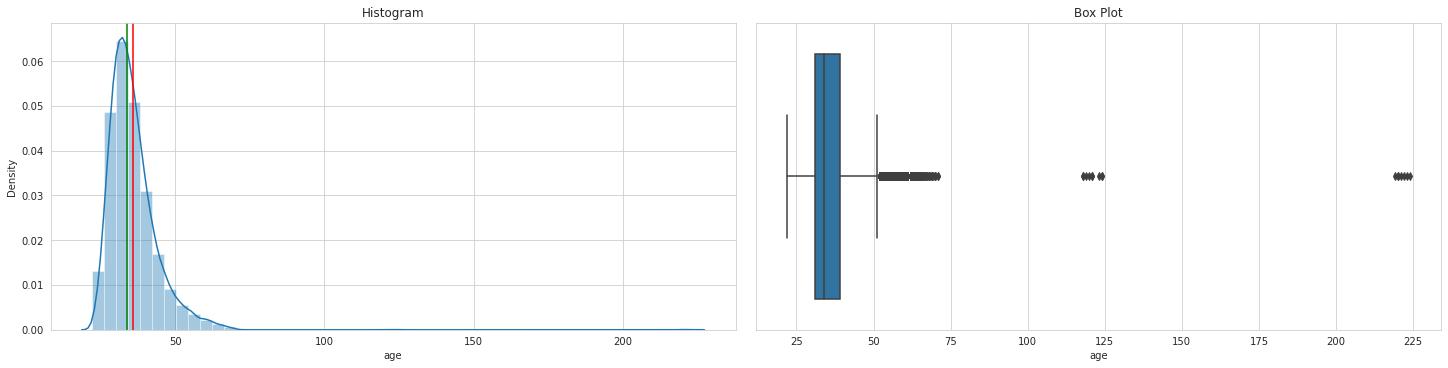

In [21]:
two_chart_plot(df, 'age')

In [22]:
df.loc[df['age'] >= 100 ].shape

(16, 43)

There are only 16 rows with age more than 100 and also they seems to be wrong as having more than 100 years of customer's age sounds unreal so we will drop these outliers

In [23]:
df.drop(df[df['age'] >= 100].index, inplace = True)

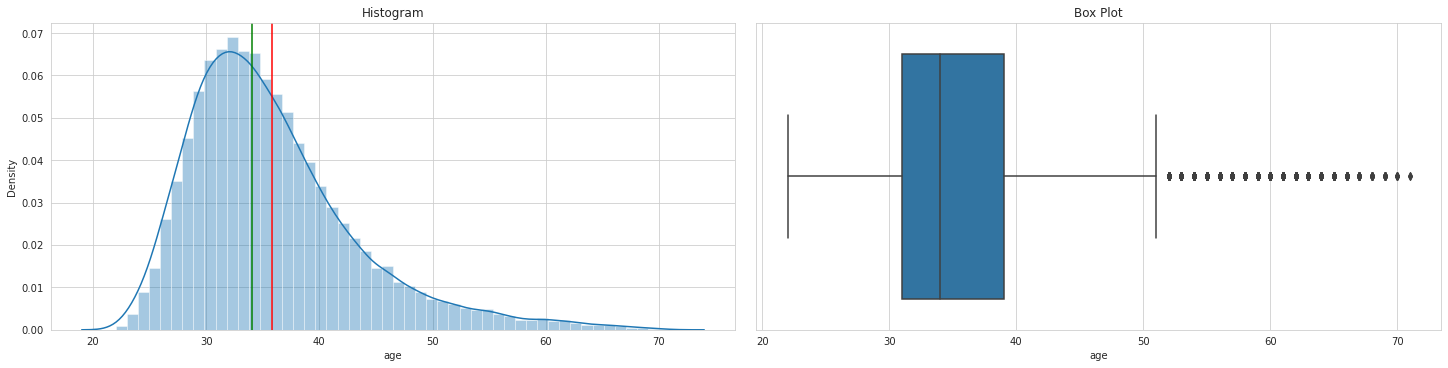

In [24]:
two_chart_plot(df, 'age')

gender  account_type
F       current          2863
        saving            645
M       current         16443
        saving           4574
Name: age, dtype: int64

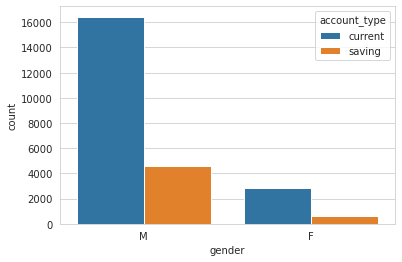

In [25]:
sns.countplot(x="gender", data=df,hue="account_type");
df.groupby(["gender" , "account_type"]).count()["age"]

The number of males are almost 5 times than that of females and the current accounts are 

<AxesSubplot:xlabel='gender', ylabel='cc_cons'>

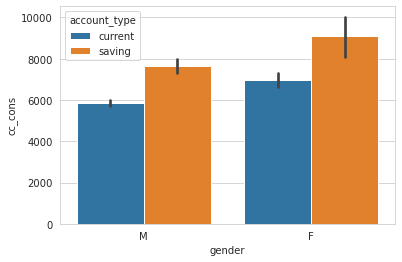

In [26]:
sns.barplot(x="gender" , y="cc_cons",hue="account_type", data=df)

Lets see which month has got maximum credit card consumption

<AxesSubplot:>

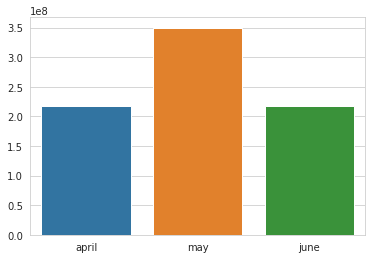

In [27]:
sns.barplot(x=["april", "may", "june"],y=[df["cc_cons_jun"].sum(),df['cc_cons_may'].sum(),df["cc_cons_jun"].sum()])

We can observe that may month has got almost 1.5 times more spending while april and june have almost same amount.

## Handling Missing Values
There is an amazing library called missingno which helps us to visualize the number of Null values present in each feature.

<AxesSubplot:>

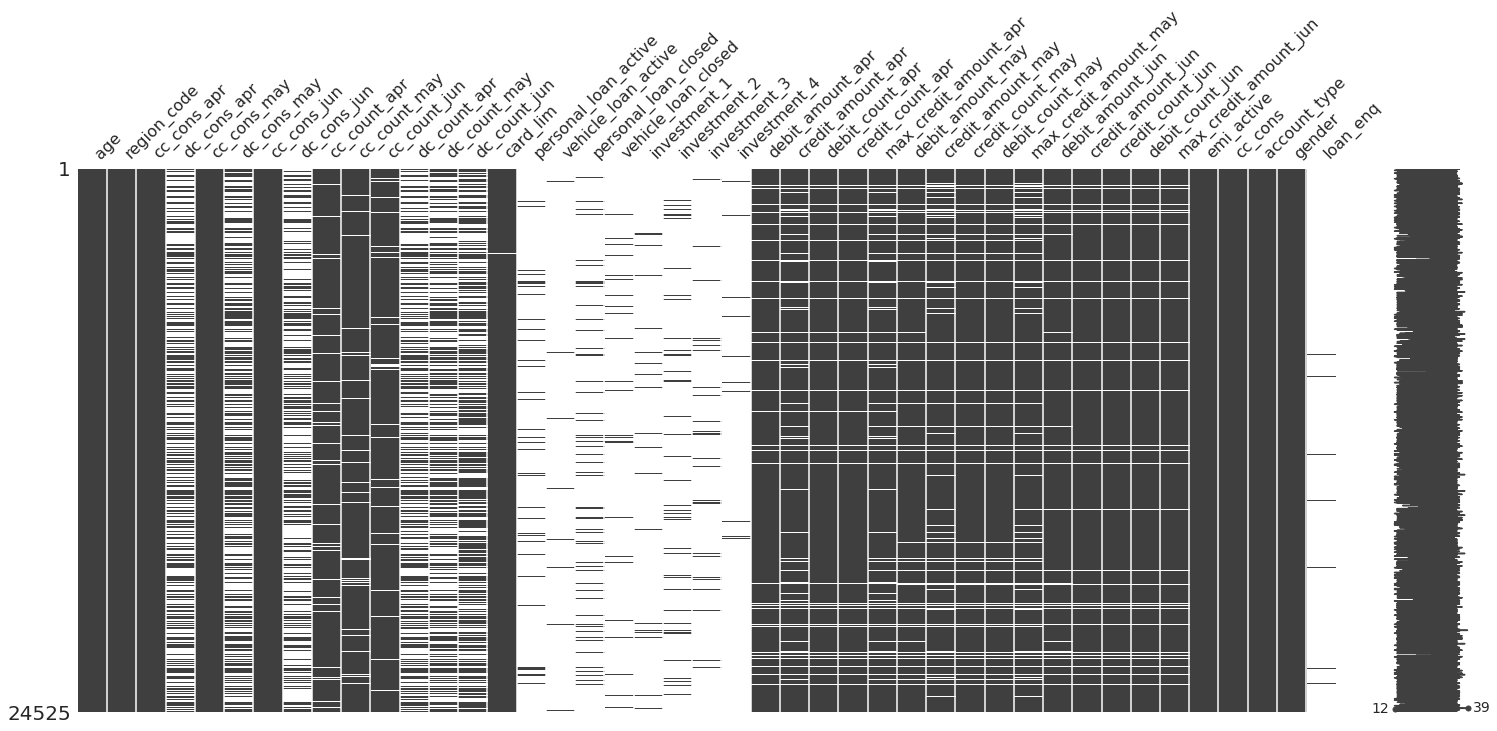

In [28]:
import missingno as msno
%matplotlib inline
msno.matrix(df)

We can see that the data has got too many null values so let us see the actual percentage of data missing in each feature.

In [29]:
def null_table(data):
    """
    A function which returns the number and percentage of null values in the given dataset.
    """
    indices = data.isnull().sum().index
    values = data.isnull().sum().values
    percentages = []
    for i in indices:
        percentages.append((data[i].isnull().sum() / data[i].shape[0]) * 100)
    d = {'Columns' : indices, 'Count of Null Values' : values, 'Null_values_percentage' : percentages}
    # data = dict(zip(indices, percentages))
    null_frame = pd.DataFrame(data = d)
    return null_frame

In [30]:
null_frame_train = null_table(df)
null_frame_train.sort_values(by = 'Null_values_percentage')
# null_frame_train

,Columns,Count of Null Values,Null_values_percentage
0,age,0,0.000000
39,cc_cons,0,0.000000
41,gender,0,0.000000
40,account_type,0,0.000000
6,cc_cons_jun,0,0.000000
38,emi_active,0,0.000000
4,cc_cons_may,0,0.000000
2,cc_cons_apr,0,0.000000
1,region_code,0,0.000000
14,card_lim,6,0.024465


In [31]:
null_frame_test = null_table(df_test)
null_frame_test.sort_values(by = 'Null_values_percentage')

,Columns,Count of Null Values,Null_values_percentage
0,account_type,0,0.000000
8,cc_cons_jun,0,0.000000
6,cc_cons_may,0,0.000000
4,cc_cons_apr,0,0.000000
41,emi_active,0,0.000000
2,age,0,0.000000
1,gender,0,0.000000
3,region_code,0,0.000000
16,card_lim,3,0.036563
11,cc_count_may,294,3.583181


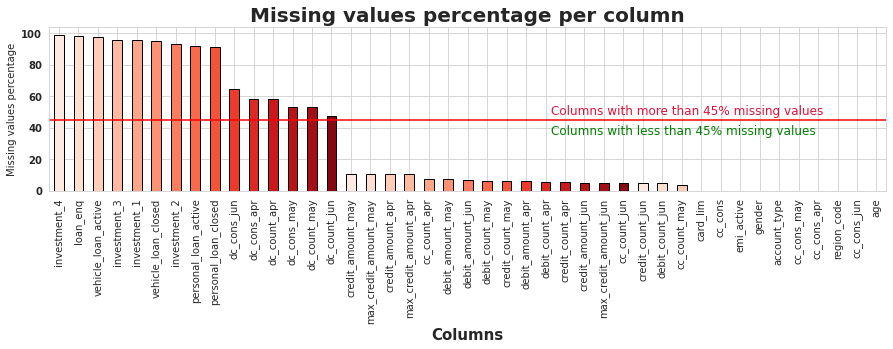

In [32]:
def msv_1(data, thresh = 20, color = 'black', edgecolor = 'black', height = 3, width = 15):
    
    plt.figure(figsize = (width, height))
    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh +10, f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 3, f'Columns with less than {thresh}% missing values', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')
    
    return plt.show()

msv_1(df, 45, color=sns.color_palette('Reds',15))


## Feature Engineering

- We can see that all the four investments have most of the rows null individually soo we wil add all of them and see if it reduces our null values.

- Also same can be by adding  both the active loans and closed loans

- credit and debit card consumptions, credit and debit card counts, debit and credit card amounts, debit and credit counts and maximum credit amount for different months majorly have got more than 45% data as null. So we can either add them all or take an average. As the target column is average consumption of all the 3 months, taking  a mean of all 3 individual month makes more sense. So we will make new features and drop the individual ones

In [33]:
df.columns

Index(['age', 'region_code', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may',
       'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr',
       'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may',
       'dc_count_jun', 'card_lim', 'personal_loan_active',
       'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed',
       'investment_1', 'investment_2', 'investment_3', 'investment_4',
       'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr',
       'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may',
       'credit_amount_may', 'credit_count_may', 'debit_count_may',
       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun',
       'emi_active', 'cc_cons', 'account_type', 'gender', 'loan_enq'],
      dtype='object')

In [34]:
# summing up the columns 
df["investment"]= df[['investment_1','investment_2','investment_3','investment_4']].sum(axis=1) 
df["totat_active_loan"]= df[['personal_loan_active','vehicle_loan_active']].sum(axis=1) 
df["total_closed_loan"]= df[['personal_loan_closed','vehicle_loan_closed']].sum(axis=1)

# taking mean of the columns
df['cc_cons_old'] = df[['cc_cons_apr', 'cc_cons_may','cc_cons_jun']].mean(axis=1)
df['dc_cons'] = df[['dc_cons_apr', 'dc_cons_may','dc_cons_jun']].mean(axis=1)
df['cc_count'] = df[['cc_count_apr', 'cc_count_may','cc_count_jun']].mean(axis=1)
df['dc_count'] = df[['dc_count_apr', 'dc_count_may','dc_count_jun']].mean(axis=1)
df['debit_amount'] = df[['debit_amount_apr', 'debit_amount_may','debit_amount_jun']].mean(axis=1)
df['credit_amount'] = df[['credit_amount_apr', 'credit_amount_may','credit_amount_jun']].mean(axis=1)
df['max_credit_amount'] = df[['max_credit_amount_apr', 'max_credit_amount_may','max_credit_amount_jun']].mean(axis=1)
df['debit_count'] = df[['debit_count_apr', 'debit_count_may','debit_count_jun']].mean(axis=1)
df['credit_count'] = df[['credit_count_apr', 'credit_count_may','credit_count_jun']].mean(axis=1)

In [35]:
# summing up the columns 
df_test["investment"]= df_test[['investment_1','investment_2','investment_3','investment_4']].sum(axis=1) 
df_test["totat_active_loan"]= df_test[['personal_loan_active','vehicle_loan_active']].sum(axis=1) 
df_test["total_closed_loan"]= df_test[['personal_loan_closed','vehicle_loan_closed']].sum(axis=1)

# taking mean of the columns
df_test['cc_cons_old'] = df_test[['cc_cons_apr', 'cc_cons_may','cc_cons_jun']].mean(axis=1)
df_test['dc_cons'] = df_test[['dc_cons_apr', 'dc_cons_may','dc_cons_jun']].mean(axis=1)
df_test['cc_count'] = df_test[['cc_count_apr', 'cc_count_may','cc_count_jun']].mean(axis=1)
df_test['dc_count'] = df_test[['dc_count_apr', 'dc_count_may','dc_count_jun']].mean(axis=1)
df_test['debit_amount'] = df_test[['debit_amount_apr', 'debit_amount_may','debit_amount_jun']].mean(axis=1)
df_test['credit_amount'] = df_test[['credit_amount_apr', 'credit_amount_may','credit_amount_jun']].mean(axis=1)
df_test['max_credit_amount'] = df_test[['max_credit_amount_apr', 'max_credit_amount_may','max_credit_amount_jun']].mean(axis=1)
df_test['debit_count'] = df_test[['debit_count_apr', 'debit_count_may','debit_count_jun']].mean(axis=1)
df_test['credit_count'] = df_test[['credit_count_apr', 'credit_count_may','credit_count_jun']].mean(axis=1)

In [36]:
cols_to_delete_1 = ['investment_1','investment_2','investment_3','investment_4','personal_loan_active','vehicle_loan_active',
                    'personal_loan_closed','vehicle_loan_closed','cc_cons_apr', 'cc_cons_may','cc_cons_jun',
                    'dc_cons_apr', 'dc_cons_may','dc_cons_jun','cc_count_apr', 'cc_count_may','cc_count_jun',
                    'dc_count_apr', 'dc_count_may','dc_count_jun','debit_amount_apr', 'debit_amount_may','debit_amount_jun',
                    'credit_amount_apr', 'credit_amount_may','credit_amount_jun',
                    'max_credit_amount_apr', 'max_credit_amount_may','max_credit_amount_jun','debit_count_apr',
                    'debit_count_may','debit_count_jun','credit_count_apr', 'credit_count_may','credit_count_jun']

In [37]:
df.drop(cols_to_delete_1, axis = 1, inplace = True)
df_test.drop(cols_to_delete_1, axis = 1, inplace = True)

In [38]:
df.head()

,age,region_code,card_lim,emi_active,cc_cons,account_type,gender,loan_enq,investment,totat_active_loan,total_closed_loan,cc_cons_old,dc_cons,cc_count,dc_count,debit_amount,credit_amount,max_credit_amount,debit_count,credit_count
0,41,723,200000.0,3083.69,12163,current,M,NaN,0.00,0.0,1.0,16668.078333,NaN,2.666667,NaN,65011.680000,65741.666667,60509.666667,9.333333,4.666667
1,41,523,16000.0,3953.04,680,current,M,NaN,0.00,0.0,0.0,5197.350000,1044.7,3.333333,3.0,19722.086667,20368.000000,13066.666667,13.000000,2.000000
2,36,864,30000.0,0.00,200,current,M,NaN,0.00,0.0,0.0,2796.186667,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN
3,38,349,50000.0,4059.07,1676,current,M,NaN,0.00,0.0,1.0,30351.276667,NaN,10.000000,NaN,27093.670000,35222.333333,26551.333333,3.000000,1.666667
4,48,523,300000.0,5804.29,1603,current,M,NaN,1547586.08,0.0,1.0,5747.800000,NaN,9.000000,NaN,79107.540000,87353.966667,48333.333333,15.666667,6.333333


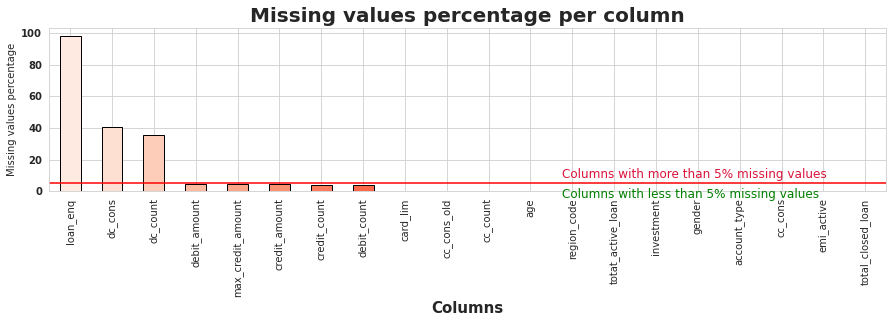

In [39]:
msv_1(df, 5, color=sns.color_palette('Reds',15))

In [40]:
null_frame_train = null_table(df)
null_frame_train.sort_values(by = 'Null_values_percentage').tail()

,Columns,Count of Null Values,Null_values_percentage
17,max_credit_amount,1101,4.489297
15,debit_amount,1118,4.558614
14,dc_count,8696,35.457696
12,dc_cons,9914,40.424057
7,loan_enq,24088,98.218145


In [41]:
df.loan_enq.value_counts()

Y    437
Name: loan_enq, dtype: int64

Loan Enquiry has stil got 98% NaN values. We will replace Y with 1 and NaN with zero as the NaNs are likely to be people who have not made any enquiry.



In [42]:
df['loan_enq'].fillna(0, inplace=True)
df['loan_enq'].replace(to_replace=dict(Y = 1, NaN = 0), inplace=True)

df_test['loan_enq'].fillna(0, inplace=True)
df_test['loan_enq'].replace(to_replace=dict(Y = 1, NaN = 0), inplace=True)


In [43]:
df.loan_enq.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    0
8    0
9    0
Name: loan_enq, dtype: int64

We will also fill the other columns along with dc_count and dc_cons with missing valuesconsidering there were no transactions were made by those customers.

In [44]:
na_cols = list(df.columns[df.isnull().any()].values)
na_cols

['card_lim',
 'dc_cons',
 'dc_count',
 'debit_amount',
 'credit_amount',
 'max_credit_amount',
 'debit_count',
 'credit_count']

In [45]:
df.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24525 entries, 0 to 24614
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                24525 non-null  int64  
 1   region_code        24525 non-null  int64  
 2   card_lim           24525 non-null  float64
 3   emi_active         24525 non-null  float64
 4   cc_cons            24525 non-null  int64  
 5   account_type       24525 non-null  object 
 6   gender             24525 non-null  object 
 7   loan_enq           24525 non-null  int64  
 8   investment         24525 non-null  float64
 9   totat_active_loan  24525 non-null  float64
 10  total_closed_loan  24525 non-null  float64
 11  cc_cons_old        24525 non-null  float64
 12  dc_cons            24525 non-null  float64
 13  cc_count           24525 non-null  float64
 14  dc_count           24525 non-null  float64
 15  debit_amount       24525 non-null  float64
 16  credit_amount      245

In [47]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8205 entries, 0 to 8204
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   account_type       8205 non-null   object 
 1   gender             8205 non-null   object 
 2   age                8205 non-null   int64  
 3   region_code        8205 non-null   int64  
 4   card_lim           8205 non-null   float64
 5   loan_enq           8205 non-null   int64  
 6   emi_active         8205 non-null   float64
 7   investment         8205 non-null   float64
 8   totat_active_loan  8205 non-null   float64
 9   total_closed_loan  8205 non-null   float64
 10  cc_cons_old        8205 non-null   float64
 11  dc_cons            8205 non-null   float64
 12  cc_count           8205 non-null   float64
 13  dc_count           8205 non-null   float64
 14  debit_amount       8205 non-null   float64
 15  credit_amount      8205 non-null   float64
 16  max_credit_amount  8205 

In [48]:
null_frame_train = null_table(df)
null_frame_train.sort_values(by = 'Null_values_percentage')

,Columns,Count of Null Values,Null_values_percentage
0,age,0,0.0
17,max_credit_amount,0,0.0
16,credit_amount,0,0.0
15,debit_amount,0,0.0
14,dc_count,0,0.0
13,cc_count,0,0.0
12,dc_cons,0,0.0
11,cc_cons_old,0,0.0
10,total_closed_loan,0,0.0
9,totat_active_loan,0,0.0


<AxesSubplot:>

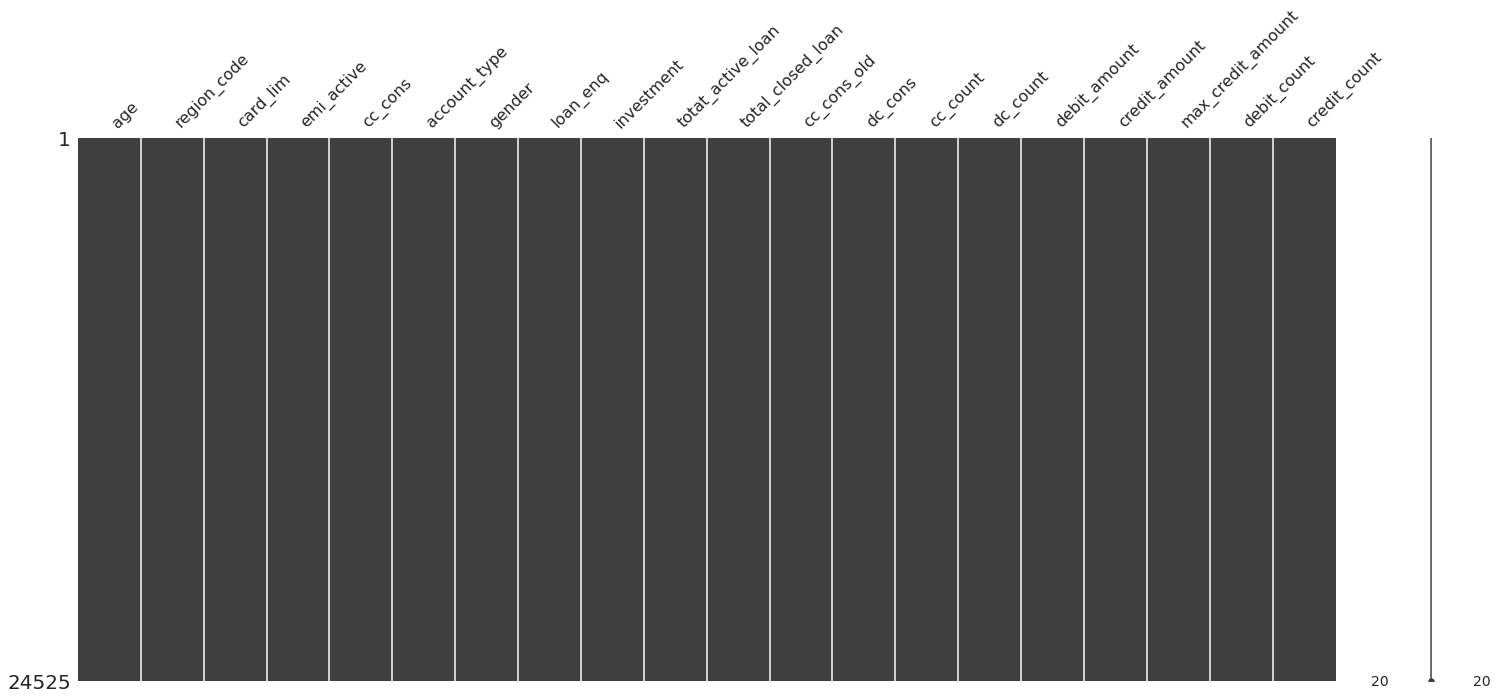

In [49]:
msno.matrix(df)

## Encoding Categorical Variables

In [50]:
cat_cols1 = df.select_dtypes(include=[object]).columns.to_list()
cat_cols1

['account_type', 'gender']

In [51]:
df = pd.get_dummies(df, prefix=['account_type', 'gender'], drop_first=True)
df_test = pd.get_dummies(df_test, prefix=['account_type', 'gender'], drop_first=True)

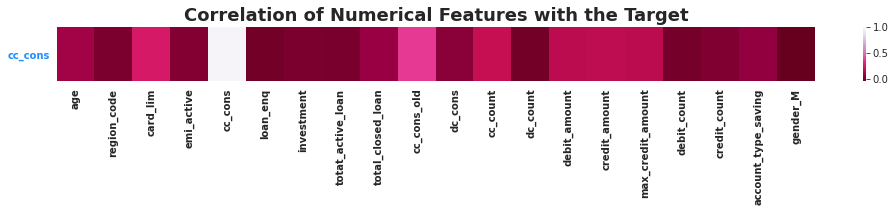

In [52]:
num = df.select_dtypes(exclude = 'object')
corr_num = num.corr()

f, ax = plt.subplots(figsize = (17, 1))

sns.heatmap(corr_num.sort_values(by = ['cc_cons'], ascending = False).head(1), cmap='PuRd_r')

plt.title('Correlation of Numerical Features with the Target', weight = 'bold', fontsize = 18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)

plt.show()

In [53]:
correlation = df.corr()['cc_cons'].sort_values(ascending = False).to_frame()
cmap = sns.light_palette("cyan", as_cmap = True)
s = correlation.style.background_gradient(cmap = cmap)
s

,cc_cons
cc_cons,1.000000
cc_cons_old,0.386038
card_lim,0.263479
cc_count,0.202214
credit_amount,0.183992
debit_amount,0.177262
max_credit_amount,0.175835
age,0.111346
total_closed_loan,0.093353
account_type_saving,0.075642


In [54]:
# split train-test

X = df.drop(columns='cc_cons')
y = df.loc[:,'cc_cons']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [55]:
def rmsle(y, y0):
    return np.sqrt(np.mean(np.square(np.log1p(y) - np.log1p(y0))))
rmsle_score = make_scorer(rmsle, greater_is_better=False)

In [56]:
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor(),
       XGBRegressor(),ElasticNet(),GradientBoostingRegressor(),DecisionTreeRegressor(), Lasso(),LinearRegression(),LGBMRegressor(),
       CatBoostRegressor(),Ridge()]

model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor','XGBRegressor','ElasticNet'
            'GradientBoostingRegressor','DecisionTreeRegressor',' Lasso','LinearRegression','LGBMRegressor','CatBoostRegressor',
            'Ridge']
rmsle=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    test_pred=clf.predict(X_test)
    rmsle.append(np.sqrt(np.mean(np.square(np.log1p(test_pred) - np.log1p(y_test)))))
d={'Modelling Algo':model_names,'RMSLE':rmsle}   
# d((key, round(val, 2)) for key, val in d.items()) 


Learning rate set to 0.064741
0:	learn: 9792.8503803	total: 59.9ms	remaining: 59.9s
1:	learn: 9699.6821916	total: 64.7ms	remaining: 32.3s
2:	learn: 9618.5166069	total: 69ms	remaining: 22.9s
3:	learn: 9535.9226292	total: 73.8ms	remaining: 18.4s
4:	learn: 9465.5789896	total: 78.5ms	remaining: 15.6s
5:	learn: 9405.0414901	total: 83.3ms	remaining: 13.8s
6:	learn: 9347.2940571	total: 87.2ms	remaining: 12.4s
7:	learn: 9294.4689802	total: 91.2ms	remaining: 11.3s
8:	learn: 9248.2279507	total: 95.2ms	remaining: 10.5s
9:	learn: 9207.6382569	total: 99.7ms	remaining: 9.87s
10:	learn: 9172.8857447	total: 104ms	remaining: 9.39s
11:	learn: 9144.4021603	total: 109ms	remaining: 8.95s
12:	learn: 9112.0767015	total: 113ms	remaining: 8.62s
13:	learn: 9083.3213884	total: 119ms	remaining: 8.4s
14:	learn: 9057.5982471	total: 125ms	remaining: 8.2s
15:	learn: 9033.1994516	total: 131ms	remaining: 8.03s
16:	learn: 9008.1268063	total: 135ms	remaining: 7.81s
17:	learn: 8983.8996411	total: 140ms	remaining: 7.62s
18

In [57]:
rmsle_frame=pd.DataFrame.from_dict(d, orient='index').transpose()
rmsle_frame

,Modelling Algo,RMSLE
0,RandomForestRegressor,1.366421
1,AdaBoostRegressor,1.742401
2,BaggingRegressor,1.384701
3,SVR,1.273850
4,KNeighborsRegressor,1.388297
5,XGBRegressor,1.344440
6,ElasticNetGradientBoostingRegressor,1.344637
7,DecisionTreeRegressor,1.329419
8,Lasso,1.669249
9,LinearRegression,1.339954


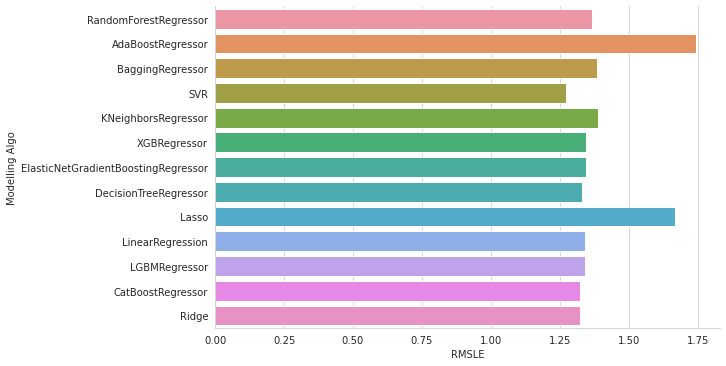

In [58]:
sns.factorplot(y='Modelling Algo',x='RMSLE',data=rmsle_frame,kind='bar',size=5,aspect=2)


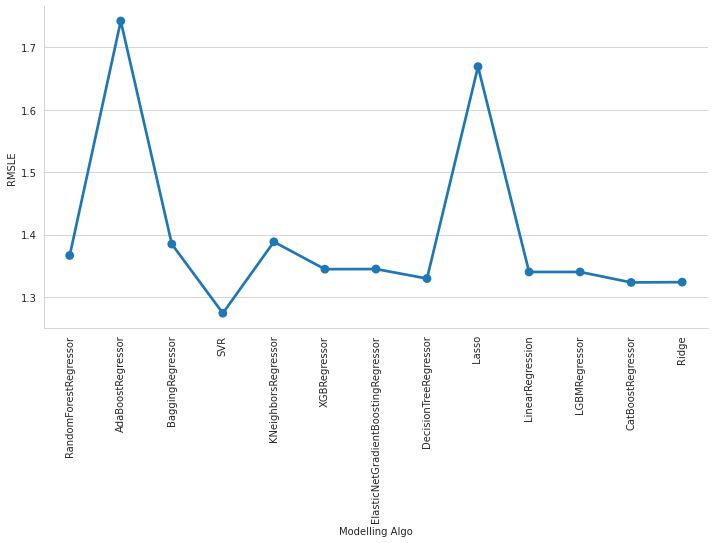

In [59]:
g = sns.factorplot(x='Modelling Algo',y='RMSLE',data=rmsle_frame,kind='point',size=5,aspect=2)
g.set_xticklabels(rotation=90)


> - As we can see that SVR is having least rmsle score, we will do some hyperparameter tunuing to check if the model improves.

In [60]:
# I will try afterward to run this on google colab to check if the grid search can help us getting a better SVR model. 

# parameters = [{'kernel': ['rbf'],
#                'epsilon': [0.1, 0.2, 0.5],
#                'gamma': [1e-4, 0.01, 0.1, 0.5],
#                'C': [1, 10, 100]
#               },
#               {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}
#              ]

# svr_cv = SVR()
# regressor_cv = GridSearchCV(svr_cv, param_grid = parameters)
# regressor_cv.fit(X_train, y_train)

The grid search was taking too much time on my kaggle kernel so I decided to use SVR without any specif parameters.


In [61]:
svr = SVR().fit(X_train,y_train)

y_pred_svr = svr.predict(df_test)

In [62]:
submission_svr = pd.DataFrame({
        "id": test_id,
        "cc_cons": y_pred_svr
    })

In [63]:
submission_svr.to_csv('submission_svr.csv', index=False)

In [64]:
sub_svr = pd.read_csv('./submission_svr.csv')
sub_svr

,id,cc_cons
0,16174,3347.387609
1,19966,3106.691456
2,18105,3146.323311
3,1201,3087.759627
4,1595,3293.567355
...,...,...
8200,29894,3090.403600
8201,15836,3183.330065
8202,13110,3123.156750
8203,13323,3226.617347
